---

# ทดลองทำ Clustering : K-Means #3 Iris data

---

จาก Library sklearn (หรือ scikit learn) เราจะเรียกใช้ datasets


*   นำเข้าข้อมูล (Load Dataset) : ในที่นี้ใช้ข้อมูล "Iris" ที่มีอยู่ใน sklearn



In [1]:
from sklearn import datasets

iris = datasets.load_iris()

ทำการเก็บข้อมูล Features ต่าง ๆ ไว้ที่ตัวแปร X .. และ เก็บข้อมูล Target ไว้ที่ตัวแปร y .. แสดงค่า Feature และ Target Names

In [2]:
X = iris.data
y = iris.target

print (iris.feature_names)
print (iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


แสดงผลข้อมูล Sepal length และ width กับ Iris หมวดหมู่ที่ต่าง ๆ กัน .. Plot กราฟ Actual

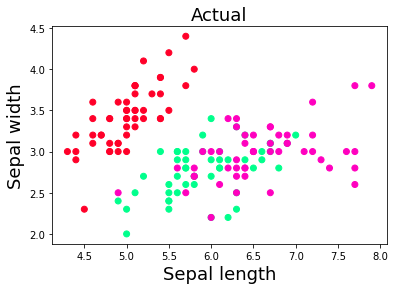

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal length', fontsize=18)
plt.ylabel('Sepal width', fontsize=18)
plt.title('Actual', fontsize=18)
plt.show()

ทำ Standard Scaler ของ Feature X

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ทำ K-Means โดยกำหนดค่า K = 3 และ Input เป็น Feature X ที่ Scale แล้ว

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, random_state=21)
km.fit(X_scaled)

KMeans(n_clusters=3, random_state=21)

แสดงจุดศูนย์กลาง Clusters ที่ได้จาก KMeans และ แปลงกลับไปยังค่าดั้งเดิม (Original) โดยใช้ scaler.inverse_transform() เพื่อแสดงผล

In [6]:
centers = km.cluster_centers_
print(centers)
centers_original = scaler.inverse_transform(centers)
print(centers_original)

[[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]
[[5.80188679 2.67358491 4.36981132 1.41320755]
 [5.006      3.428      1.462      0.246     ]
 [6.78085106 3.09574468 5.5106383  1.97234043]]


แสดงผลลัพธ์ที่ได้จากการทำ K-Means .. Plot กราฟผลลัพธ์จาก KMeans .. เปรียบเทียบกับรูปด้านบน (Actual)

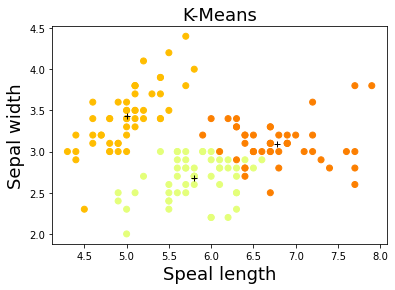

In [7]:
plt.scatter(X[:,0], X[:,1], c=km.labels_, cmap='Wistia')
plt.plot(centers_original[:,0], centers_original[:,1], 'k+')
plt.xlabel('Speal length', fontsize=18)
plt.ylabel('Sepal width', fontsize=18)
plt.title('K-Means', fontsize=18)
plt.show()

Text(0.5, 1.0, 'Predicted')

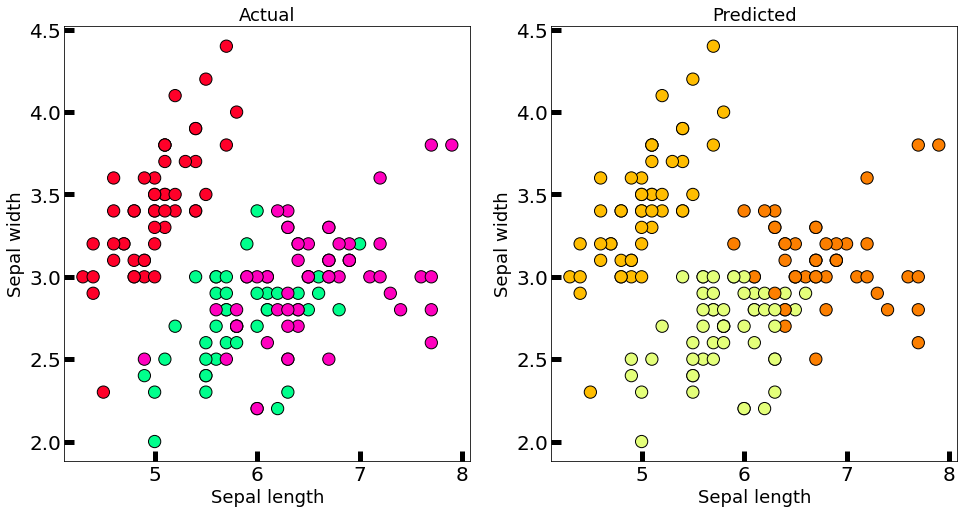

In [8]:
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='Wistia',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)